# Dropping Variables

In [15]:
import pandas as pd 

# Reads the dataset
df = pd.read_excel('listings NYC_final_updated.xlsx') 
df.shape

(51082, 18)

In [16]:
categorical_var = list(set(df.dtypes[df.dtypes == object].index) - set(['price']))

In [17]:
zero_cardinality = [] 

for i in categorical_var: # for each categorical variables
    if len(df[i].value_counts().index) == 1: # check how many levels it has and if it is one
        zero_cardinality.append(i) # the variable has zero variance as the cardinality is one 
        # append it to the list of categorical variables with zero variation
        
zero_cardinality

[]

In [18]:
df = df.drop(zero_cardinality, axis = 1) 

In [19]:
categorical_var = list(set(df.dtypes[df.dtypes == object].index) - set(['price'])) 

# Creates a list of categorical variables with high cardinality
high_cardinality = [] 

for i in categorical_var: # for each categorical variables
    if len(df[i].value_counts().index) >200: # check how many levels it has and if it is more
        high_cardinality.append(i) # than 200, variable has many levels
        # so append it to the list of categorical variables with high cardinality
        
high_cardinality

['zipcode']

In [20]:
df = df.drop(high_cardinality, axis = 1)

In [21]:
numerical_var = list(set(df.columns) - set(df.dtypes[df.dtypes == object].index))

numerical_var

['extra_people',
 'number_of_reviews',
 'bathrooms',
 'longitude',
 'security_deposit',
 'beds',
 'review_scores_rating',
 'guests_included',
 'cleaning_fee',
 'accommodates',
 'bedrooms',
 'maximum_nights',
 'minimum_nights',
 'latitude',
 'price']

In [22]:
df = df.drop(['latitude', 'longitude'], axis=1)

# Data Imputation

In [23]:
[sum(df[i].isnull()) for i in df.columns] 

[0, 0, 47, 75, 340, 0, 17580, 10743, 0, 0, 0, 0, 0, 11317, 0]

In [24]:
empty_variables = [] 

for i in df.columns: 
    if sum(df[i].isnull()) > 30000: 
        empty_variables.append(i) 
        
empty_variables

[]

In [25]:
df=df.drop(empty_variables, axis=1)

In [26]:
numerical_var = list(set(df.columns) - set(df.dtypes[df.dtypes == object].index))

categorical_var = list(set(df.dtypes[df.dtypes == object].index) - set(['price']))

df[numerical_var] = df[numerical_var].fillna(df[numerical_var].median(), 
                                             inplace = False)

df[categorical_var] = df[categorical_var].fillna(df[categorical_var].mode(), 
                                                 inplace = False)

In [27]:
empty_variables = [] 

for i in df.columns: 
    if sum(df[i].isnull()) > 0: 
        empty_variables.append(i) 
        
empty_variables

[]

# Data Visualization

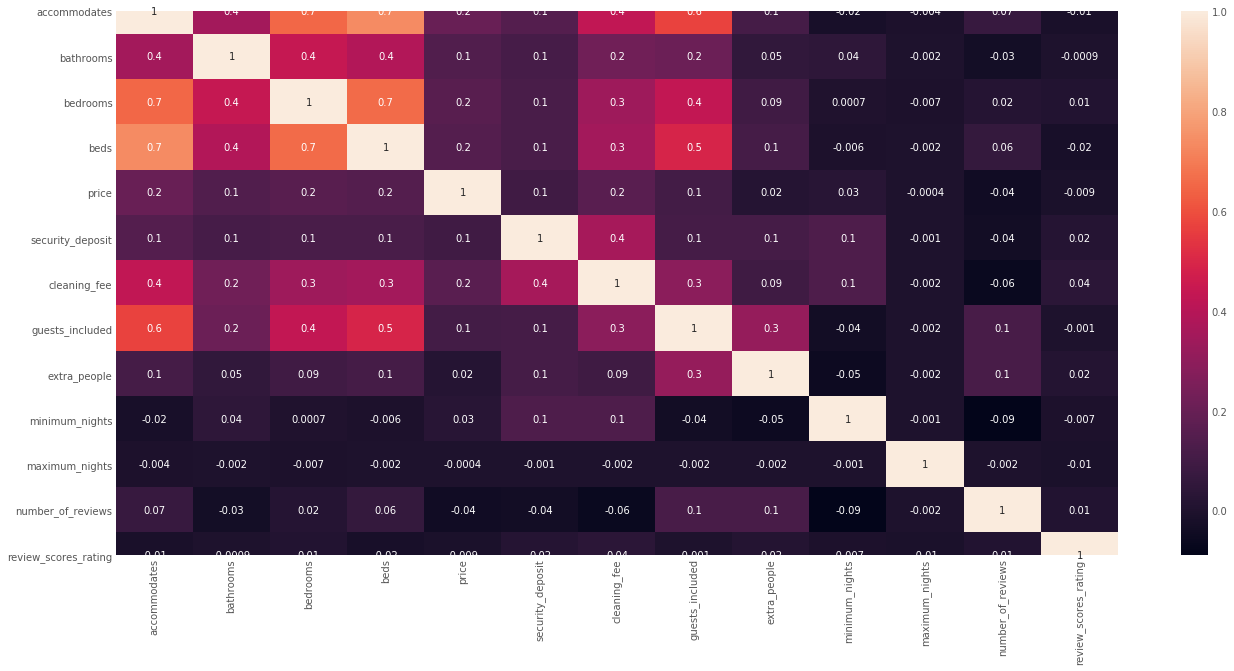

In [129]:
import seaborn as sns

sns.heatmap(df.corr(), annot = True, fmt='.1g')

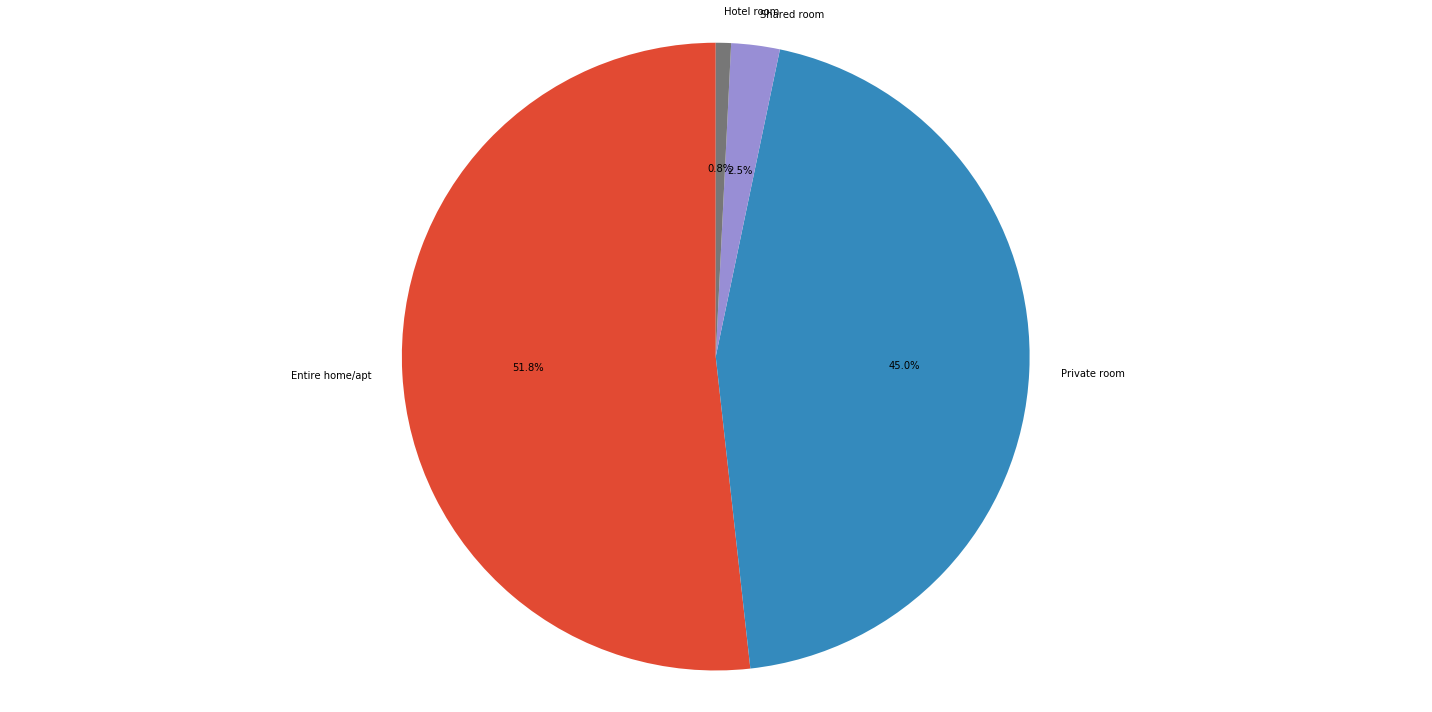

In [136]:
fig1, ax1 = plt.subplots()

x = list(df['room_type'].value_counts().index) 
y = list(df['room_type'].value_counts())

ax1.pie(y, labels = x, autopct='%1.1f%%', startangle=90)

ax1.axis('equal') 

plt.tight_layout()  

plt.show() 

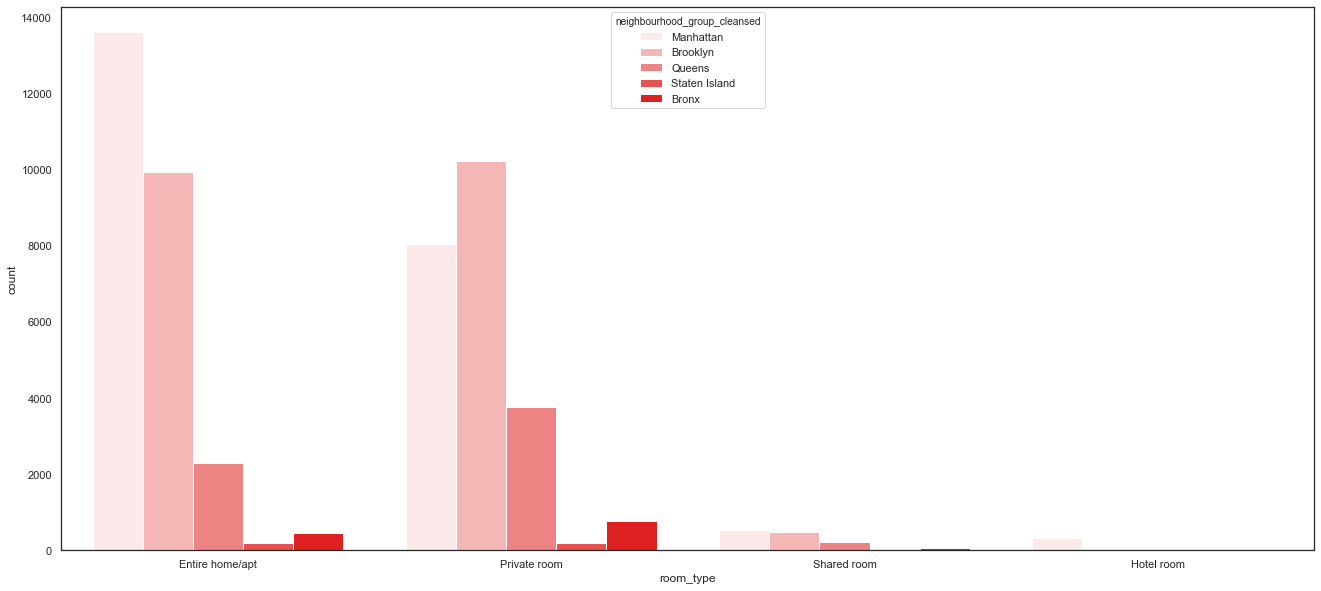

In [141]:
sns.set(style="white") 

ax = sns.countplot(x='room_type', hue = 'neighbourhood_group_cleansed', data = df,
                  color = 'red')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


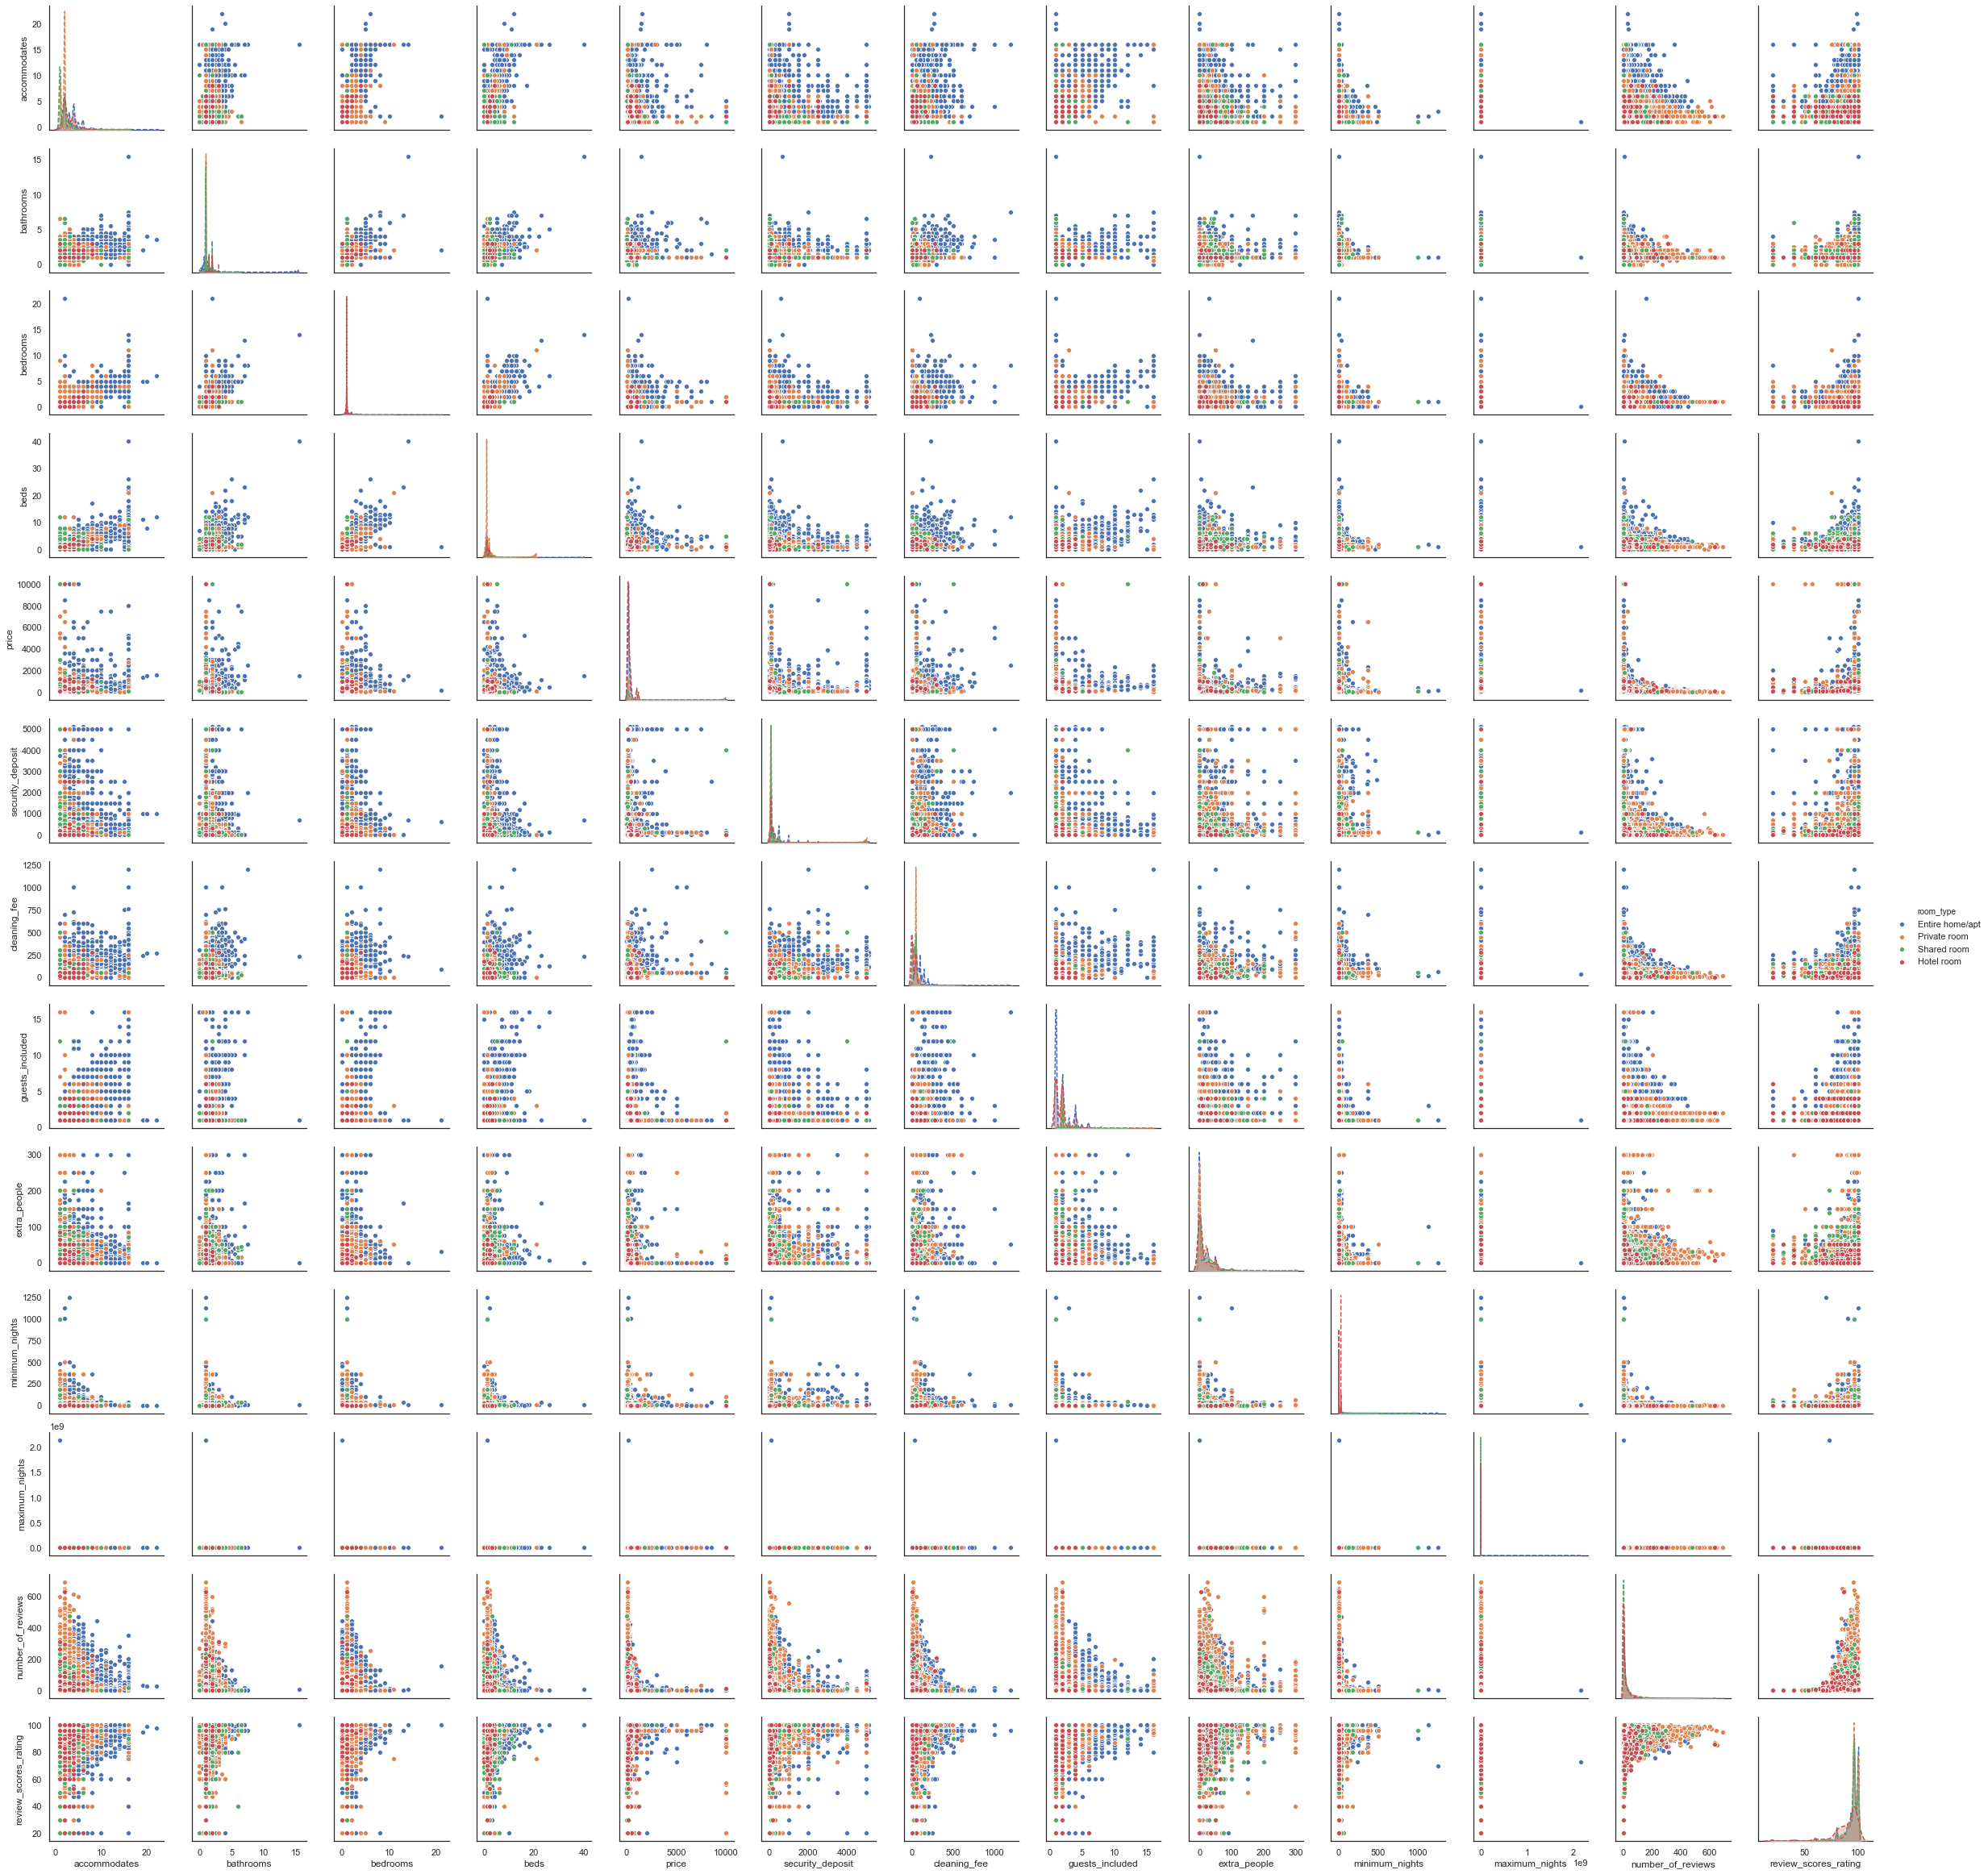

In [142]:
sns.pairplot(df, hue = 'room_type')

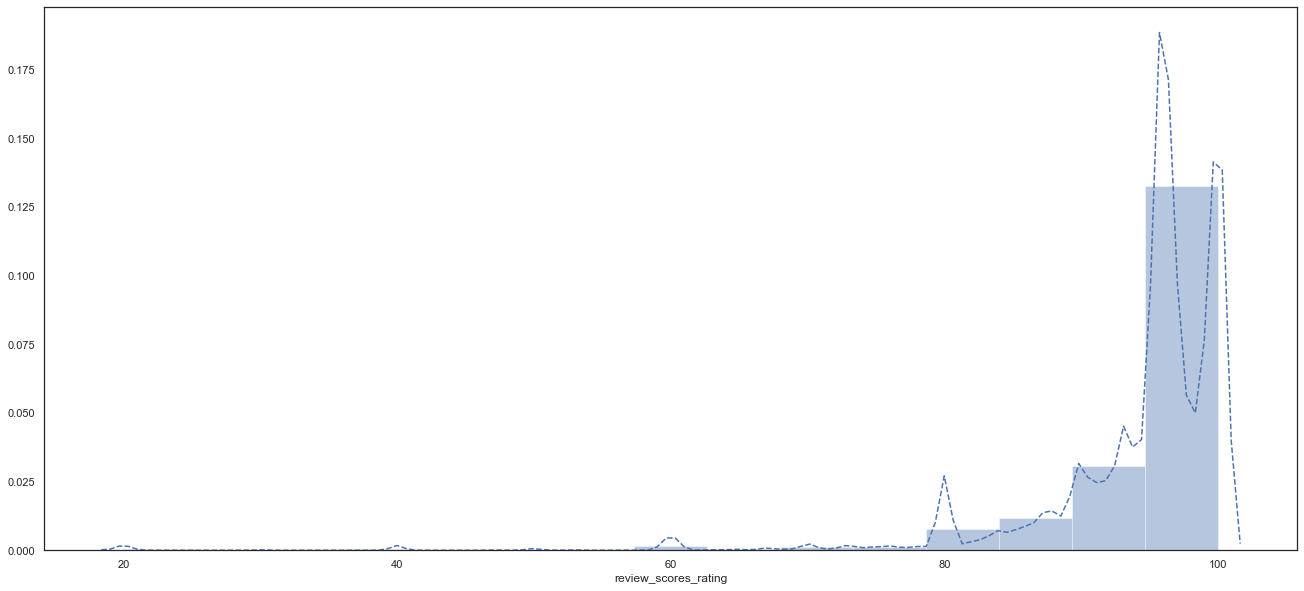

In [144]:
ax = sns.distplot(df['review_scores_rating'], bins = 15) 

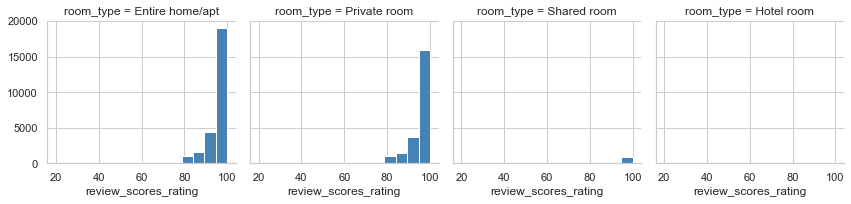

In [145]:
sns.set(style="whitegrid") 

g = sns.FacetGrid(df, col="room_type", margin_titles=True) 

ax  = g.map(plt.hist, "review_scores_rating", color="steelblue", bins = 15)

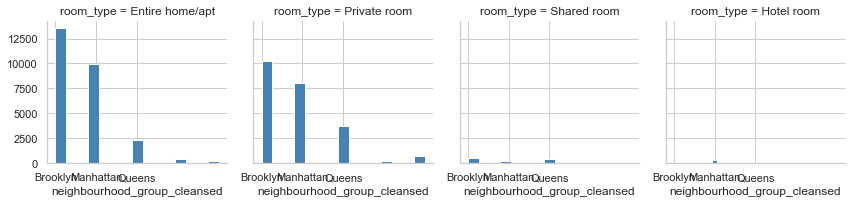

In [148]:
sns.set(style="whitegrid") 

g = sns.FacetGrid(df, col="room_type", margin_titles=True) 

ax  = g.map(plt.hist, "neighbourhood_group_cleansed", color="steelblue", bins = 15)

# Eliminating Multicollinearity

In [28]:
import numpy as np

df_cor = df.corr()
pd.DataFrame(np.linalg.inv(df.corr().values), index = df_cor.index, columns=df_cor.columns)

,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
accommodates,2.934894,-0.024703,-0.621088,-1.256345,-0.173420,-0.004179,-0.403612,-0.686929,0.152702,0.092016,0.004254,-0.080439,0.034592
bathrooms,-0.024703,1.286587,-0.401690,-0.204565,-0.074151,-0.039792,-0.041434,0.035201,-0.012881,-0.038819,-0.001364,0.049760,0.002274
bedrooms,-0.621088,-0.401690,2.133086,-0.714921,-0.023911,0.010814,-0.081618,-0.111618,0.004656,0.008740,0.008952,0.041699,-0.039800
beds,-1.256345,-0.204565,-0.714921,2.582204,0.030518,0.013302,-0.036615,-0.182683,-0.007315,-0.011024,-0.005267,-0.041918,0.037822
price,-0.173420,-0.074151,-0.023911,0.030518,1.061302,-0.042388,-0.075259,0.021813,0.000365,-0.008720,-0.000572,0.040571,0.010806
security_deposit,-0.004179,-0.039792,0.010814,0.013302,-0.042388,1.170597,-0.391561,0.017677,-0.103715,-0.102304,0.000013,0.017213,-0.008278
cleaning_fee,-0.403612,-0.041434,-0.081618,-0.036615,-0.075259,-0.391561,1.429266,-0.083423,-0.020781,-0.143454,-0.000342,0.100863,-0.054135
guests_included,-0.686929,0.035201,-0.111618,-0.182683,0.021813,0.017677,-0.083423,1.685898,-0.416192,0.024277,-0.002130,-0.086615,0.001333
extra_people,0.152702,-0.012881,0.004656,-0.007315,0.000365,-0.103715,-0.020781,-0.416192,1.144517,0.058609,0.002082,-0.095545,-0.012628
minimum_nights,0.092016,-0.038819,0.008740,-0.011024,-0.008720,-0.102304,-0.143454,0.024277,0.058609,1.046724,0.001535,0.063281,0.013839


In [29]:
#dropping variables with vif greater than 2.5

df=df.drop(['accommodates', 'beds'], axis=1)

# Encoding Categorical Variables

In [30]:
categorical_var = list(set(df.dtypes[df.dtypes == object].index) - set(['price']))

dummy_cat_df = pd.get_dummies(df[categorical_var], drop_first=True) 
df = df.drop(categorical_var, axis = 1) 
df = pd.concat([df, dummy_cat_df], axis = 1) 

In [31]:
df = df.fillna(0)

# Model

In [32]:
import numpy as np

labels = np.array(df['price'])
features= df.drop('price', axis = 1)
feature_list = list(features.columns)
features = np.array(features)


In [33]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels);

In [35]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 73.46 degrees.


In [36]:
import numpy
mape = 100 * (errors / test_labels)

numpy.savetxt("mape.csv", mape, delimiter=",")

#we calculated the mean from the csv in MS Excel as numpy was somehow not able to calculate the mean.
accuracy = 100 - 5.73
print('Accuracy:', accuracy, '%.')

Accuracy: 94.27 %.


C:\Users\ravib\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


# Feature Importance

In [37]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: extra_people         Importance: 0.14
Variable: maximum_nights       Importance: 0.13
Variable: minimum_nights       Importance: 0.12
Variable: number_of_reviews    Importance: 0.11
Variable: review_scores_rating Importance: 0.11
Variable: cleaning_fee         Importance: 0.08
Variable: security_deposit     Importance: 0.06
Variable: bedrooms             Importance: 0.05
Variable: guests_included      Importance: 0.05
Variable: room_type_Private room Importance: 0.05
Variable: bathrooms            Importance: 0.04
Variable: neighbourhood_group_cleansed_Manhattan Importance: 0.03
Variable: room_type_Shared room Importance: 0.01
Variable: room_type_Hotel room Importance: 0.0
Variable: neighbourhood_group_cleansed_Brooklyn Importance: 0.0
Variable: neighbourhood_group_cleansed_Queens Importance: 0.0
Variable: neighbourhood_group_cleansed_Staten Island Importance: 0.0


In [38]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

important_indices = [feature_list.index('extra_people'),feature_list.index('review_scores_rating'), 
                     feature_list.index('number_of_reviews'), feature_list.index('cleaning_fee'), feature_list.index('security_deposit'),
                     feature_list.index('guests_included'), feature_list.index('minimum_nights'), feature_list.index('maximum_nights'), 
                     feature_list.index('bedrooms'), feature_list.index('bathrooms')]
train_important = train_features[:, important_indices]
test_important = test_features[:, important_indices]

rf_most_important.fit(train_important, train_labels)

predictions = rf_most_important.predict(test_important)
errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 82.9 degrees.


In [39]:
mape = 100 * (errors / test_labels)

numpy.savetxt("mape2.csv", mape, delimiter=",")

#we calculated the mean from the csv in MS Excel as numpy was somehow not able to calculate the mean.
accuracy = 100 - 6.74
print('Accuracy:', accuracy, '%.')

Accuracy: 93.26 %.


C:\Users\ravib\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


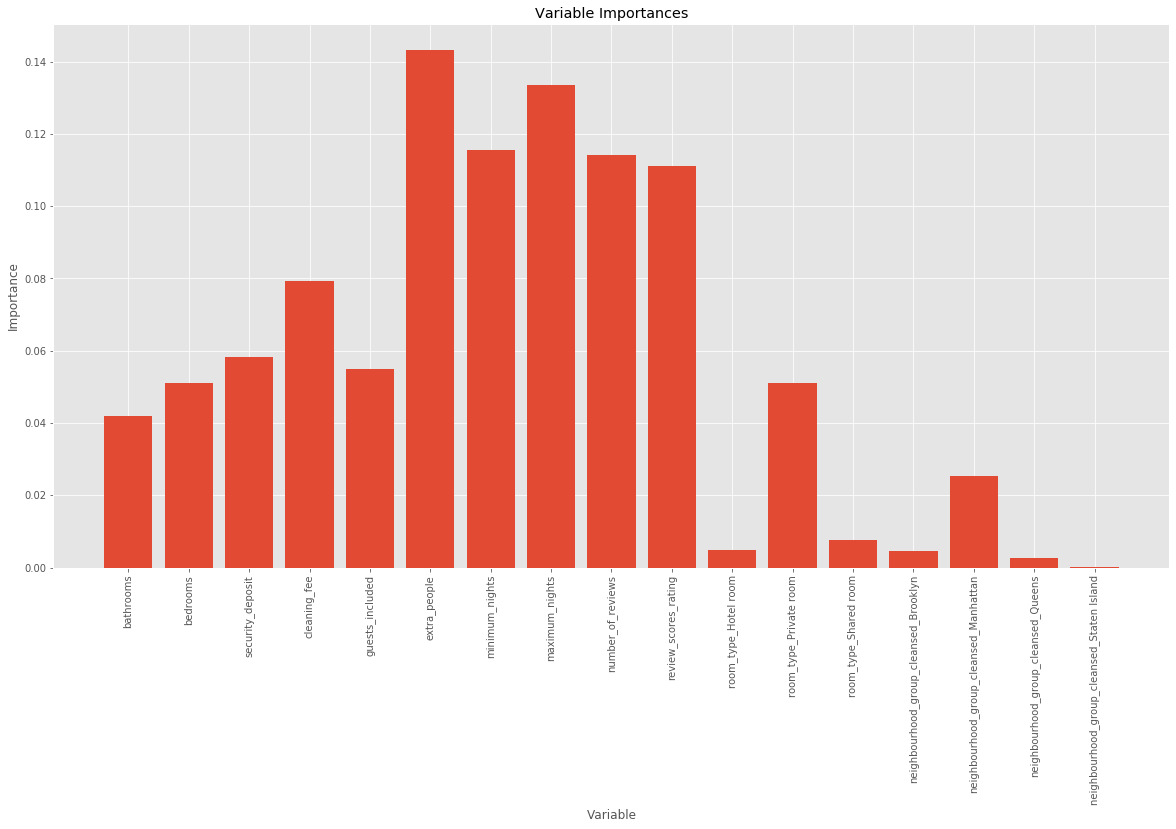

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (20,10)

x_values = list(range(len(importances)))

plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');